# Book Recommender System

 #### Dataset: https://www.kaggle.com/zygmunt/goodbooks-10k 

### 1] Importing required libraries and dataset

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

 -----------------------------------------------------------------------------------------------------------------------
 
 
 **The data used for this task consist of 5 different datasets which are loaded and presented as below :**
 
  1) **books.csv** - Books contains all the information about the rated books, including author, title, book ID, publication year, average rating, etc.
  
 2) **ratings.csv** - Ratings includes all the rates given by our selected group of users to the books they have chosen to rate.
 
 3) **book_tags.csv** - Book Tags contains all the tags associated to each and every book included in the analysis.
 
 4) **tags.csv** - Tags collects all the tags included in 'bookTags' and explains their meaning.
 
 5) **to_read.csv** - to_read indicates all the books that have been flagged as 'to read' by the readers included in the analysis.
 


In [2]:
books = pd.read_csv("C:/Users/DELL/Downloads/books.csv")
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [3]:
ratings = pd.read_csv("C:/Users/DELL/Downloads/ratings.csv")
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [4]:
book_tags = pd.read_csv("C:/Users/DELL/Downloads/book_tags.csv")
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [5]:
tags = pd.read_csv("C:/Users/DELL/Downloads/tags.csv")
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [6]:
to_read = pd.read_csv("C:/Users/DELL/Downloads/to_read.csv")
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


### 2] Data Analysis

####  (i) Data Analysis for "books.csv" dataset -

In [7]:
books.shape  # books dataset contains 10000 rows x 23 columns

(10000, 23)

In [8]:
books.isnull().sum()   # Looking for null values

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [9]:
books.dtypes   # Datatypes for each columns

id                             int64
book_id                        int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
dtype: object

In [10]:
len(books.id.unique())  # There is information for 10000 different books in total

10000


With the purpose of having a quick look at what are the books with the highest average rating, sorted the dataset by average rating, selecting only the most relevant columns out of the 23 columns. 

The selected sample of users seem to like quite a lot **Bill Watterson's 'Calvin and Hobbes' comic series.**

In [11]:
# Books with the highest average rating:

books[['id', 'book_id', 
       'authors', 'title', 
       'average_rating', 'ratings_count']].sort_values('average_rating', ascending = False).head(10)

,id,book_id,authors,title,average_rating,ratings_count
3627,3628,24812,Bill Watterson,The Complete Calvin and Hobbes,4.82,28900
3274,3275,8,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.77,33220
861,862,17332218,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",4.77,73572
8853,8854,95602,Francine Rivers,Mark of the Lion Trilogy,4.76,9081
7946,7947,5031805,"Anonymous, Lane T. Dennis, Wayne A. Grudem",ESV Study Bible,4.76,8953
4482,4483,24814,Bill Watterson,It's a Magical World: A Calvin and Hobbes Coll...,4.75,22351
6360,6361,70489,Bill Watterson,There's Treasure Everywhere: A Calvin and Hobb...,4.74,16766
421,422,862041,J.K. Rowling,"Harry Potter Boxset (Harry Potter, #1-7)",4.74,190050
3752,3753,10,J.K. Rowling,"Harry Potter Collection (Harry Potter, #1-6)",4.73,24618
6919,6920,24815,Bill Watterson,The Indispensable Calvin and Hobbes,4.73,14597


#### (ii) Data Analysis for "ratings.csv" dataset -

In [12]:
ratings.shape   # ratings dataset contains 981756 rows x 3 columns

(981756, 3)

In [13]:
ratings.isnull().sum() # Looking for null values. No null-values found

book_id    0
user_id    0
rating     0
dtype: int64

In [14]:
ratings.dtypes # Datatypes for each columns

book_id    int64
user_id    int64
rating     int64
dtype: object

In [15]:
len(ratings.book_id.unique())  # There are ratings for 10000 different books in total

10000

In [16]:
len(ratings.user_id.unique())  # Ratings to these 10000 books have been given by 53424 unique users

53424

#### (iii) Data Analysis for "book_tags" dataset -

In [17]:
book_tags.shape  # book_tags dataset contains 999912 rows x 3 columns

(999912, 3)

In [18]:
book_tags.isnull().sum() # No null-values found

goodreads_book_id    0
tag_id               0
count                0
dtype: int64

In [19]:
book_tags.dtypes  # Datatypes of the columns

goodreads_book_id    int64
tag_id               int64
count                int64
dtype: object

In [20]:
len(book_tags.goodreads_book_id.unique()) # There are 10000 different books in total

10000

In [21]:
len(book_tags.tag_id.unique())  #  34252 unique tags in total

34252

#### (iv) Data Analysis for "tags" dataset -

In [22]:
tags.shape   # tags dataset contains 34252 rows x 2 columns

(34252, 2)

In [23]:
tags.isnull().sum()  # No null-values

tag_id      0
tag_name    0
dtype: int64

In [24]:
tags.dtypes # Datatypes

tag_id       int64
tag_name    object
dtype: object

In [25]:
len(tags.tag_id.unique())  # There are 34252 unique tags that means dataset contains no duplicate record. 

34252

#### (v) Data Analysis for "to_read" dataset -

In [26]:
to_read.shape  # to_read dataset contains 912705 rows x 2 columns

(912705, 2)

In [27]:
to_read.isnull().sum()  # No null-values 

user_id    0
book_id    0
dtype: int64

In [28]:
to_read.dtypes  # Datatypes of each columns

user_id    int64
book_id    int64
dtype: object

In [29]:
len(to_read.book_id.unique())  # 9986 uniques books have given 'to_read' tag

9986

In [30]:
len(to_read.user_id.unique())  # 48871 unique users have used 'to_read' tag to read at least one book out of 10000 books

48871

#### Data Manipulation

When we look closely to rating dataset we can see that there are several users who have rated the same book more than once.
So, we will erase those duplicated ratings from the rating table i.e for those user-book pairs that have more than one rating we will then keep only one record, indicating the average of the given ratings.

In [31]:
# Here's the code to check which user-book pair have more than one rating

user_per_book_ratecount = ratings.groupby(['user_id', 'book_id'], 
                                      as_index = False).count().sort_values('rating', ascending = False)
user_per_book_ratecount.head(10)

,user_id,book_id,rating
59787,3204,8946,5
729574,38259,3996,4
11033,691,6472,4
665335,34548,7420,4
81315,4359,2515,4
42643,2308,8946,4
572,42,8946,4
95001,5091,8946,4
81324,4359,3470,3
54390,2935,8946,3


In [32]:
ratings[(ratings.user_id == 3204) & (ratings.book_id == 8946)] # cross-checking if the above code is true

,book_id,user_id,rating
883706,8946,3204,5
883707,8946,3204,5
883708,8946,3204,5
883709,8946,3204,5
883710,8946,3204,4


In [33]:
# So as to get rid of the duplicates rows, now we calculate rating mean per user-book 
# So that we can later replace the mean to the rating values

user_per_book_ratemean = ratings.groupby(['user_id', 'book_id'],
                                       as_index = False).mean().sort_values('rating', ascending = False)
user_per_book_ratemean.head(10)

,user_id,book_id,rating
489739,25094,6395,5.0
280475,14074,6665,5.0
280450,14074,3575,5.0
280449,14074,3539,5.0
280448,14074,3477,5.0
280447,14074,3340,5.0
280445,14074,3128,5.0
280444,14074,2868,5.0
280443,14074,2705,5.0
280442,14074,2668,5.0


In [34]:
user_per_book_ratemean[(user_per_book_ratemean.user_id == 3204) 
                       & (user_per_book_ratemean.book_id == 8946)] # cross verifying above code

,user_id,book_id,rating
59787,3204,8946,4.8


In [35]:
# Calculating & Adding mean and rating count column to each user-book pair

ratings['count'] = ratings['rating']
user_per_book_rate = ratings.groupby(['user_id', 'book_id'], as_index = False) \
                   .agg({'rating' : 'mean', 'count' : 'count'}) \
                   .rename(columns = {'rating':'mean'}).sort_values('count', ascending = False)
ratings = ratings.drop(['count'], axis = 1)
user_per_book_rate.head()

,user_id,book_id,mean,count
59787,3204,8946,4.8,5
729574,38259,3996,5.0,4
11033,691,6472,5.0,4
665335,34548,7420,5.0,4
81315,4359,2515,5.0,4


In [36]:
ratings = pd.merge(ratings, user_per_book_rate, on = ['user_id', 'book_id'])
ratings.head()

,book_id,user_id,rating,mean,count
0,1,314,5,5.0,1
1,1,439,3,3.0,1
2,1,588,5,5.0,1
3,1,1169,4,4.0,1
4,1,1185,4,4.0,1


In [37]:
ratings.sort_values('count', ascending = False).head(10)

,book_id,user_id,rating,mean,count
883710,8946,3204,4,4.8,5
883706,8946,3204,5,4.8,5
883709,8946,3204,5,4.8,5
883708,8946,3204,5,4.8,5
883707,8946,3204,5,4.8,5
251241,2515,4359,5,5.0,4
883651,8946,42,5,5.0,4
399011,3996,38259,5,5.0,4
883720,8946,5091,5,5.0,4
883719,8946,5091,5,5.0,4


In [38]:
ratings.shape

(981756, 5)

In [39]:
# Droping all the duplicate record for which user has given more than one rating for same book
ratings = ratings.drop_duplicates(subset = ['book_id', 'user_id'], 
                                  keep = 'first', inplace = False).sort_values('count', ascending = False)
ratings = ratings.drop(['rating', 'count'], axis = 1)
ratings.head(10)

,book_id,user_id,mean
883706,8946,3204,4.800000
399011,3996,38259,5.000000
883651,8946,42,5.000000
883697,8946,2308,5.000000
736954,7420,34548,5.000000
883717,8946,5091,5.000000
644166,6472,691,5.000000
251241,2515,4359,5.000000
883694,8946,2078,5.000000
234947,2352,2981,3.333333


In [40]:
ratings.shape # We can see 981756- 979478 = 2278 records were duplicate which is removed

(979478, 3)

In [41]:
ratings.columns = ['book_id', 'user_id', 'rating'] # storing back in te same format as it was

For making more relevant recommendations, We will look at what is the ratings distribution per users i.e we will check if there are users who have rated very few books.

In [42]:
rate_per_user = ratings[['user_id', 'rating']].groupby(['user_id'], as_index = False).count() \
                      .rename(columns = {'rating' : 'total_ratings'}).sort_values('total_ratings', ascending = False)
rate_per_user.head()

,user_id,total_ratings
12873,12874,200
30943,30944,200
52035,52036,199
12380,12381,199
28157,28158,199


#### Data Visualization

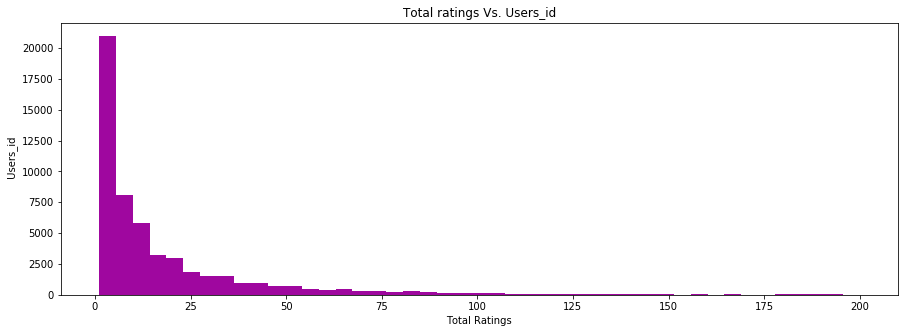

In [43]:
plt.figure(figsize = (15,5))
plt.hist(rate_per_user['total_ratings'], bins = 45, color = '#9F079F')
plt.xlabel("Total Ratings")
plt.ylabel(" Users_id")
plt.title("Total ratings Vs. Users_id")
plt.show()

The histogram above shows how many users have rated only 1 to 25 books. 

Considering that we are using only the subset 10000 of all the books listed in Goodreads, it will be difficult to give accurate recommendation to users with that few ratings.

Further in the analysis, I have included only users that have rated at least 20 of the 10000 books.

In [44]:
ratings = pd.merge(ratings, rate_per_user, on = ['user_id'])
ratings = ratings.sort_values('total_ratings', ascending = False)
ratings.head(10)

,book_id,user_id,rating,total_ratings
486526,81,12874,4.0,200
977600,1492,30944,4.0,200
977605,2209,30944,5.0,200
977604,2269,30944,5.0,200
977603,1431,30944,5.0,200
977602,1391,30944,3.0,200
977782,3077,30944,5.0,200
977707,245,30944,4.0,200
977706,232,30944,5.0,200
977705,239,30944,4.0,200


In [45]:
# Keeping only the users with more than a minimum of ratings
min_ratings = ratings['total_ratings'] <= 20 
min_ratings.sum()

272086

In [46]:
ratings = ratings[-min_ratings]
len(ratings) # Only 707392 are kept

707392

In [47]:
#  total of remaining users after removing the ones with less than the minimum
len(ratings.user_id.unique()) 

13971

In [48]:
 # total of remaining books after removing users with less than the established minimum
len(ratings.book_id.unique()) 

9998

Similarly, looking for the books that have very few ratings.Now to avoid recommandation of those books which are read by few user, we will remove the book with less than 30 ratings

In [51]:
rate_per_book = ratings[['book_id', 'rating']].groupby(['book_id'], as_index = False).count() \
                      .rename(columns = {'rating' : 'ratings_recieved'}).sort_values('ratings_recieved', ascending = False)
rate_per_book.tail()

,book_id,ratings_recieved
9342,9345,2
9855,9858,1
9087,9090,1
8802,8804,1
8371,8372,1


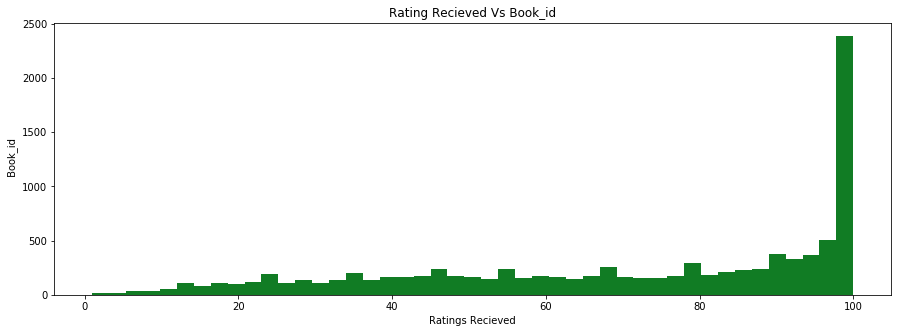

In [52]:
plt.figure(figsize = (15,5))
plt.hist(rate_per_book['ratings_recieved'], bins = 45, color = '#117C24')
plt.xlabel("Ratings Recieved")
plt.ylabel(" Book_id")
plt.title("Rating Recieved Vs Book_id")
plt.show()

In [53]:
ratings = pd.merge(ratings, rate_per_book, on = ['book_id'])
min_ratings_recieved = ratings.ratings_recieved <= 30
min_ratings_recieved.sum()

23480

In [54]:
ratings = ratings[-min_ratings_recieved]
len(ratings)

683912

In [55]:
len(ratings.user_id.unique()) 

13970

In [56]:
len(ratings.book_id.unique())

8826

### Item Based Collabrative Filtering

In this we will create user by book matrix, in which each row indicates a single user, and each columns represents a single book. The resulting table contains an extremely high number of NAN's, due to the fact that - even the users who have read the highest number of books in our dataset, they have just read roughly 1% of all the books in the analysis.

In [57]:
ratings_title = pd.merge(ratings, books[['id', 'title']], left_on = 'book_id', right_on = 'id')
each_book_rating = pd.pivot_table(ratings_title, index = 'user_id', columns = 'title', values = 'rating')
each_book_rating

title,"Angels (Walsh Family, #3)",#GIRLBOSS,'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die","10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works","100 Bullets, Vol. 1: First Shot, Last Call",100 Love Sonnets,100 Selected Poems,"10th Anniversary (Women's Murder Club, #10)",...,god is Not Great: How Religion Poisons Everything,number9dream,sTORI Telling,"xxxHolic, Vol. 1 (xxxHOLiC, #1)",الفيل الأزرق,تراب الماس,عزازيل,هيبتا,يوتوبيا,ڤيرتيجو
user_id,,,,,,,,,,,,,,,,,,,,,
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
each_book_rating.shape

(13970, 8795)

In [59]:
book_corr = np.corrcoef(each_book_rating.T)

In [60]:
book_corr.shape

(8795, 8795)

In [61]:
books=  list(each_book_rating)
book_titles = [] 
for i in range(len(books)):
    book_titles.append(books[i])
book_titles

[' Angels (Walsh Family, #3)',
 '#GIRLBOSS',
 "'Salem's Lot",
 "'Tis (Frank McCourt, #2)",
 '1,000 Places to See Before You Die',
 '10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works',
 '100 Bullets, Vol. 1: First Shot, Last Call',
 '100 Love Sonnets',
 '100 Selected Poems',
 "10th Anniversary (Women's Murder Club, #10)",
 '11 Birthdays (Willow Falls, #1)',
 '11/22/63',
 "11th Hour (Women's Murder Club, #11)",
 "12th of Never (Women's Murder Club, #12)",
 '13 Little Blue Envelopes (Little Blue Envelope, #1)',
 '14',
 '1421: The Year China Discovered America',
 '1491: New Revelations of the Americas Before Columbus',
 '1493: Uncovering the New World Columbus Created',
 '14th Deadly Sin (Women’s Murder Club, #14)',
 "15th Affair (Women's Murder Club #15)",
 '1776',
 '1919',
 '1984',
 '1Q84',
 '1Q84 BOOK 1 (1Q84, #1)',
 "1st to Die (Women's Murder Club, #1)",
 '2 States: The Story of My Marriage',
 '2001: A Space O

In [62]:
book = 'Black Hole'
book_index = book_titles.index(book)
corr_score = book_corr[book_index]
print(sorted(corr_score, reverse=True))

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [63]:
def new_recommendation(books_list):
    book_similarities = np.zeros(book_corr.shape[0])
    for book in books_list:    
        book_index = book_titles.index(book)
        book_similarities += book_corr[book_index] 
    book_preferences = []
    for i in range(len(book_titles)):
        book_preferences.append((book_titles[i],book_similarities[i]))        
    return sorted(book_preferences, key= lambda x: x[1], reverse=True)

In [64]:
my_fav_books = ['Black Hole','Attachments', 'The Kite Runner']
book_recommendations = new_recommendation(my_fav_books)

In [65]:
i=0
count=0
while count <= 5:
    book_to_read = book_recommendations[i][0]
    i += 1
    if book_to_read in my_fav_books:
        continue
    else:
        print(book_to_read)
        count += 1

 Angels (Walsh Family, #3)
#GIRLBOSS
'Salem's Lot
'Tis (Frank McCourt, #2)
1,000 Places to See Before You Die
10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works
